In [1]:
import numpy as np
from numpy.random import rand
from scipy.stats import entropy
from qssp import *

In [2]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### Package Name: QSSP (Quantum State Stochastic Processes)

Core Components:
- Basic HMM class 
- Quantum State class
- Quantum Measurement class
- QuantumStateHMM class

Basic Functionality:
1. Generate stochastic processes of quantum states.
2. Compute their quantum properties. 
3. Measure them.
4. Compute the properties of the measured processes. 

## 1. HMMs
Basic, builds off of numpy arrays.

In [3]:
#Let's build the Nemo process from scratch: 
t0 = np.array([[0.5, 0, 0],[0,0,0],[0.5,0,0]])
t1 = np.array([[0, 0.5, 0],[0,0,1],[0.5,0,0]])
nemo = HMM([t0,t1])

In [4]:
#quick look at the HMM's properties
print(nemo.Ts)
print(nemo.stationary_distribution())
print(nemo.is_unifilar())
print(nemo.all_words(3))

[array([[0.5, 0. , 0. ],
       [0. , 0. , 0. ],
       [0.5, 0. , 0. ]]), array([[0. , 0.5, 0. ],
       [0. , 0. , 1. ],
       [0.5, 0. , 0. ]])]
[0.5  0.25 0.25]
True
(['000', '100', '110', '001', '101', '011', '111'], [0.09375000000000001, 0.09374999999999997, 0.1875, 0.09375000000000001, 0.09374999999999997, 0.18750000000000003, 0.25])


In [5]:
#sample n words of length L according to their probabilities
nemo.sample_words(10, 3)

['011', '101', '111', '011', '011', '111', '110', '110', '111', '000']

In [6]:
#compute the entropy in the hidden states, this is Cmu if the HMM is unifilar
nemo.state_entropy()

1.5

In [7]:
b_ents = nemo.block_entropies(15)

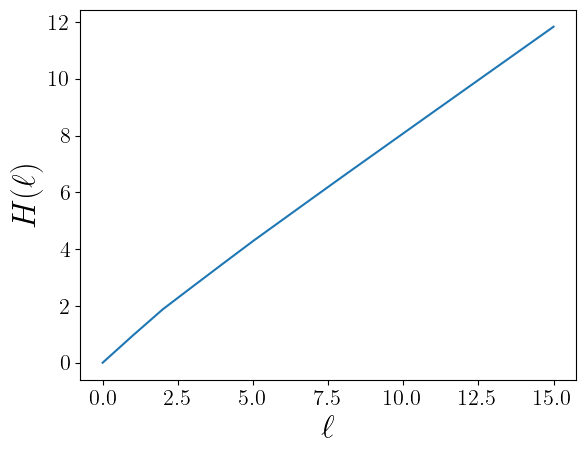

In [8]:
plt.clf()

plt.plot(range(0,16),b_ents)

plt.xlabel(r'$\ell$', fontsize=24)
plt.ylabel(r'$H(\ell)$', fontsize=24)
plt.tick_params(labelsize=16)

plt.show()

In [9]:
hmus = [nemo.entropy_rate_approx(l) for l in range(1,15)]
print(hmus[-1])

0.7506867453594488


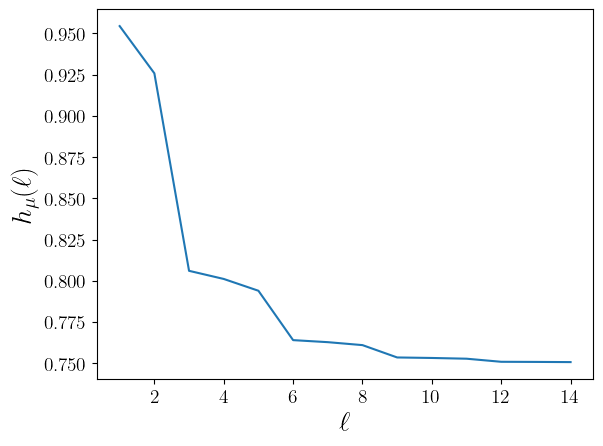

In [10]:
plt.clf()
plt.plot(range(1,15),hmus)

plt.xlabel(r'$\ell$', fontsize=20)
plt.ylabel(r'$h_\mu(\ell)$', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

In [11]:
ees = [nemo.excess_entropy_approx(l) for l in range(1,15)]
print(ees[-1])

0.5713027646983786


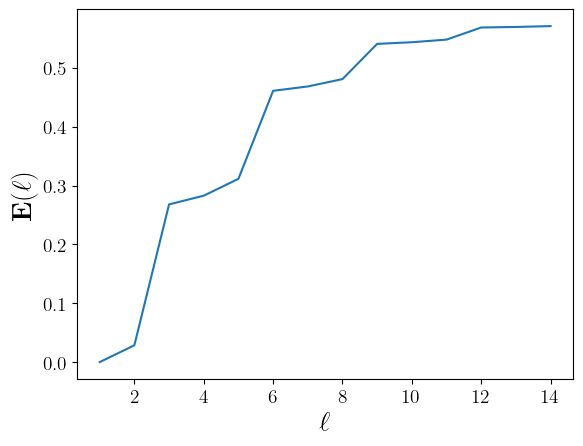

In [12]:
plt.clf()
plt.plot(range(1,15),ees)

plt.xlabel(r'$\ell$', fontsize=20)
plt.ylabel(r'$\mathbf{E}(\ell)$', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()

## 2. q-states and measurements

In [13]:
print('0 ket:\n', ket0.state)
print('\n+ ket:\n', ketp.state)

0 ket:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]

+ ket:
 [[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


In [14]:
rand_ket = bloch_ket(theta = np.pi * rand(), phi = 2*np.pi * rand())

print('random ket:\n', rand_ket.state)

print('\nIs Normalized?: ', rand_ket.is_normalized())
print('Is Hermitian?: ', rand_ket.is_hermitian())
print('Is Positive?: ', rand_ket.is_positive())
print('Is Pure?: ', rand_ket.is_pure())
print('Von Neumann Entropy: ', rand_ket.vn_entropy())

random ket:
 [[0.0864934 +0.j         0.27584987-0.05402905j]
 [0.27584987+0.05402905j 0.9135066 +0.j        ]]

Is Normalized?:  True
Is Hermitian?:  True
Is Positive?:  True
Is Pure?:  True
Von Neumann Entropy:  0.0


In [15]:
rand_dm = qstate(2/3 * rand_ket.state + 1/3 * ket0.state)
print('random density matrix: \n', rand_dm.state)

print('\nIs Normalized?: ', rand_dm.is_normalized())
print('Is Hermitian?: ', rand_dm.is_hermitian())
print('Is Positive?: ', rand_dm.is_positive())
print('Is Pure?: ', rand_dm.is_pure())
print('Von Neumann Entropy: ', rand_dm.vn_entropy())

random density matrix: 
 [[0.3909956 +0.j         0.18389991-0.03601937j]
 [0.18389991+0.03601937j 0.6090044 +0.j        ]]

Is Normalized?:  True
Is Hermitian?:  True
Is Positive?:  True
Is Pure?:  False
Von Neumann Entropy:  0.859785933883272


In [16]:
print('{0,1} Measurement:\n', [M_01.mOps[i] for i in range(0,M_01.n_ops)])
print('\n{+,-} Measurement:\n', M_param(theta=np.pi/2).mOps)

{0,1} Measurement:
 [array([[1, 0],
       [0, 0]]), array([[0, 0],
       [0, 1]])]

{+,-} Measurement:
 [array([[0.5+0.j, 0.5+0.j],
       [0.5+0.j, 0.5+0.j]]), array([[ 0.5+0.j, -0.5+0.j],
       [-0.5+0.j,  0.5+0.j]])]


In [17]:
rand_M = M_param(theta = np.pi * rand(), phi = 2*np.pi * rand())

print('Random Measurement:\n', rand_M.mOps)

print('\nIs Complete?: ', rand_M.is_complete())
print('Is Positive?: ', rand_M.is_positive())

Random Measurement:
 [array([[ 0.4579141 +0.j       , -0.44616083-0.2217415j],
       [-0.44616083+0.2217415j,  0.5420859 +0.j       ]]), array([[0.5420859 +0.j       , 0.44616083+0.2217415j],
       [0.44616083-0.2217415j, 0.4579141 +0.j       ]])]

Is Complete?:  True
Is Positive?:  True


In [18]:
print('Measurement statistics for 0-ket in the {0,1} basis:\n', ket0.measure(M_01))

print('\nMeasurement statistics for random ket in the {0,1} basis:\n', rand_ket.measure(M_01))

print('\n 10 sample measurements:\n', rand_ket.measure_sample(M_01,10))


print('\nMeasurement statistics for random ket in a random basis:\n', rand_ket.measure(rand_M))

print('\n 10 sample measurements:\n', rand_ket.measure_sample(rand_M,10))

Measurement statistics for 0-ket in the {0,1} basis:
 [1. 0.]

Measurement statistics for random ket in the {0,1} basis:
 [0.0864934 0.9135066]

 10 sample measurements:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Measurement statistics for random ket in a random basis:
 [0.31261975 0.68738025]

 10 sample measurements:
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 0.]


## 3. qsHMMs



In [19]:
# Creating {0,+} Quantum Golden Mean
L = 8
gm = GoldenMean()
gm_0p = qsHMM(gm, A_0p)

# Density matrix describing L=3 words of the {0,+} Quantum Golden Mean
print('{0,+} Quantum Golden Mean, L=3 Density Matrix: \n\n', gm_0p.q_block(L=3).state)

print('\n von Neumann entropy of L=3 Density Matrix: \n\n', gm_0p.q_block(L=3).vn_entropy())

{0,+} Quantum Golden Mean, L=3 Density Matrix: 

 [[0.27083333+0.j 0.14583333+0.j 0.1875    +0.j 0.0625    +0.j
  0.14583333+0.j 0.10416667+0.j 0.0625    +0.j 0.02083333+0.j]
 [0.14583333+0.j 0.14583333+0.j 0.0625    +0.j 0.0625    +0.j
  0.10416667+0.j 0.10416667+0.j 0.02083333+0.j 0.02083333+0.j]
 [0.1875    +0.j 0.0625    +0.j 0.1875    +0.j 0.0625    +0.j
  0.0625    +0.j 0.02083333+0.j 0.0625    +0.j 0.02083333+0.j]
 [0.0625    +0.j 0.0625    +0.j 0.0625    +0.j 0.0625    +0.j
  0.02083333+0.j 0.02083333+0.j 0.02083333+0.j 0.02083333+0.j]
 [0.14583333+0.j 0.10416667+0.j 0.0625    +0.j 0.02083333+0.j
  0.14583333+0.j 0.10416667+0.j 0.0625    +0.j 0.02083333+0.j]
 [0.10416667+0.j 0.10416667+0.j 0.02083333+0.j 0.02083333+0.j
  0.10416667+0.j 0.10416667+0.j 0.02083333+0.j 0.02083333+0.j]
 [0.0625    +0.j 0.02083333+0.j 0.0625    +0.j 0.02083333+0.j
  0.0625    +0.j 0.02083333+0.j 0.0625    +0.j 0.02083333+0.j]
 [0.02083333+0.j 0.02083333+0.j 0.02083333+0.j 0.02083333+0.j
  0.02083333+

In [20]:
print('{0,+} Quantum Golden Mean Block Entropies: \n', gm_0p.q_block_entropies(L))

print('\n{0,+} Quantum Golden Mean Entropy Rate: \n', gm_0p.q_entropy_rate(L))

print('\n{0,+} Quantum Golden Mean Excess Entropy: \n', gm_0p.q_excess_entropy(L))

{0,+} Quantum Golden Mean Block Entropies: 
 [0, 0.5500477595827576, 1.007280814654124, 1.4575289480897418, 1.9070860342632245, 2.3565707230229274, 2.8060475979831514, 3.2555236199536774, 3.7049995479130557]

{0,+} Quantum Golden Mean Entropy Rate: 
 0.4494759279593783

{0,+} Quantum Golden Mean Excess Entropy: 
 0.10919212423802938


In [21]:
# Quantum Information Quantities for {0,theta} Quantum Golden Mean

num_thetas = 7

gm = GoldenMean()
thetas = np.linspace(0, np.pi,num_thetas)

gm_0theta_ents = []

for theta in thetas:
    # Creating quantum alphabet consisting of 0-ket and theta-ket
    ket_theta = bloch_ket(theta)
    A_0theta = np.array([ket0,ket_theta])
    
    # Creating 0-theta Golden Mean QSHMM
    gm_0theta = qsHMM(gm,A_0theta)
    
    # Calculating quantum block entropies
    ent_theta = gm_0theta.q_block_entropies(L)
    
    gm_0theta_ents.append(ent_theta)

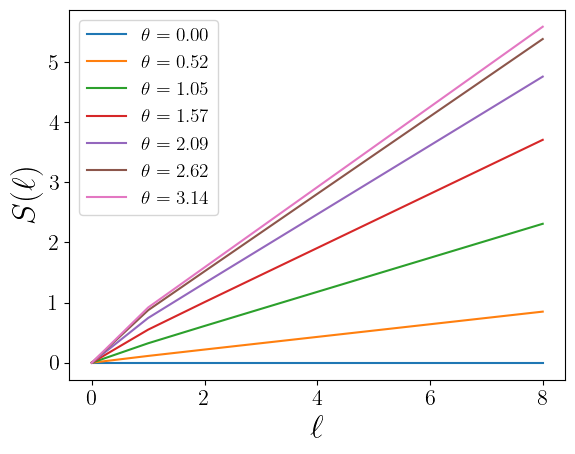

In [22]:
# Quantum Block Entropy with Different Alphabet States

plt.clf()

for i in range(0,len(thetas)):
    plt.plot(range(L+1), gm_0theta_ents[i], label=r'$\theta = {:10.2f}$'.format(thetas[i]))
    
    
plt.xlabel(r'$\ell$', fontsize=24)
plt.ylabel(r'$S(\ell)$', fontsize=24)
plt.legend(prop={'size':14})
plt.tick_params(labelsize=16)

plt.show()

In [32]:
# Quantum Entropy Rate/Excess Entropy with different alphabets

num_thetas = 100

thetas = np.linspace(0, np.pi,num_thetas)

gm_0theta_s = []
gm_0theta_E = []

for theta in thetas:
    # Creating quantum alphabet consisting of 0-ket and theta-ket
    ket_theta = bloch_ket(theta)
    A_0theta = np.array([ket0,ket_theta])
    
    # Creating 0-theta Golden Mean QSHMM
    gm_0theta = qsHMM(gm,A_0theta)
    
    # Calculating quantum entropy rate/excess entropy
    s_theta = gm_0theta.q_entropy_rate(L)
    E_theta = gm_0theta.q_excess_entropy(L)
    
    gm_0theta_s.append(s_theta)
    gm_0theta_E.append(E_theta)

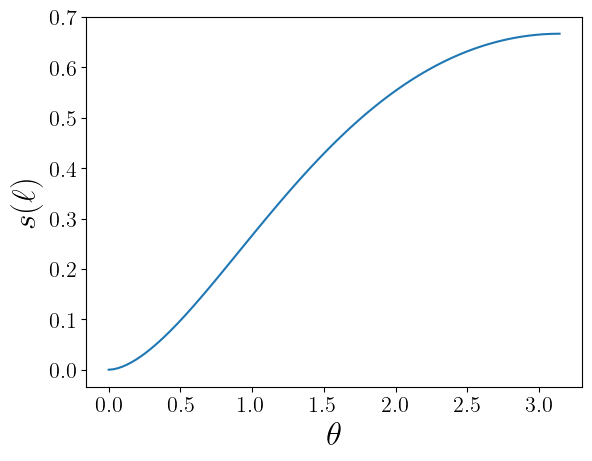

In [33]:
plt.clf()

plt.plot(np.linspace(0,np.pi,num_thetas), gm_0theta_s)
    
plt.xlabel(r'$\theta$', fontsize=24)
plt.ylabel(r'$s(\ell)$', fontsize=24)
plt.tick_params(labelsize=16)

plt.show()

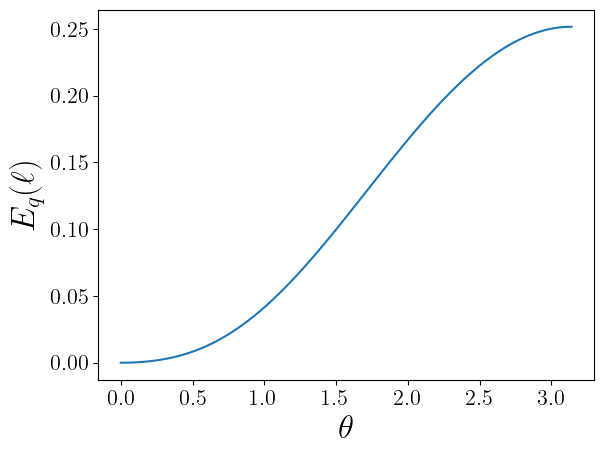

In [34]:
plt.clf()

plt.plot(np.linspace(0,np.pi,num_thetas), gm_0theta_E)
    
plt.xlabel(r'$\theta$', fontsize=24)
plt.ylabel(r'$E_q(\ell)$', fontsize=24)
plt.tick_params(labelsize=16)

plt.show()

## 4. Applying measurements to a qsHMM

In [35]:
#Quantum state with theta = 2pi/3, call it |a>
keta = bloch_ket(2*np.pi/3)
#alphabet |0>, |a>
A_0a = np.array([ket0,keta])
#golden mean hmm
gm = GoldenMean()

In [36]:
#build the 0a-golden mean qshmm
gm0a = qsHMM(gm, A_0a)

In [37]:
#measurements sweeping theta from 0 to pi
thetas = np.linspace(0, np.pi, 50)
mmts = [M_param(t) for t in thetas]

In [38]:
#measured machines 
m_gm0a = [gm0a.get_measured_machine(m) for m in mmts]

In [39]:
hmus_gm0a = [machine.entropy_rate_approx(15) for machine in m_gm0a] 

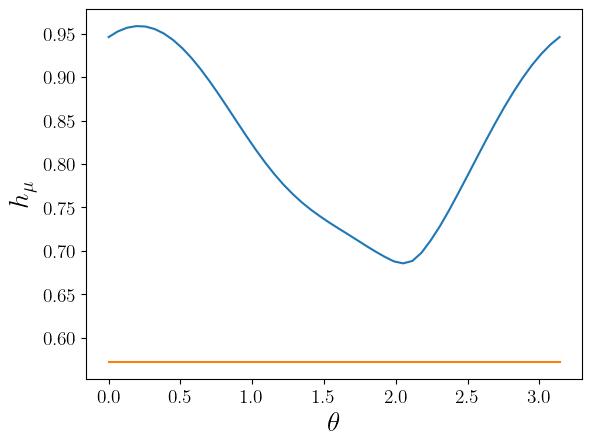

In [40]:
plt.clf()

plt.plot(thetas,hmus_gm0a)
plt.plot(thetas, [gm0a.q_entropy_rate(L) for theta in thetas])

plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel(r'$h_\mu$', fontsize=20)
plt.tick_params(labelsize=14)

plt.show()